# **CİGDEM UYUMAZ Assignment 2**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
nx.__version__

'2.5.1'

# **London Transport Network Analysis**

We developed a new product. We would like to introduce this product to people in the most central locations and to distribute the brochure of our store.
I would like to find the central location to advetise our new product.

In this study and I use graph theory to represent London metro network to find central locations

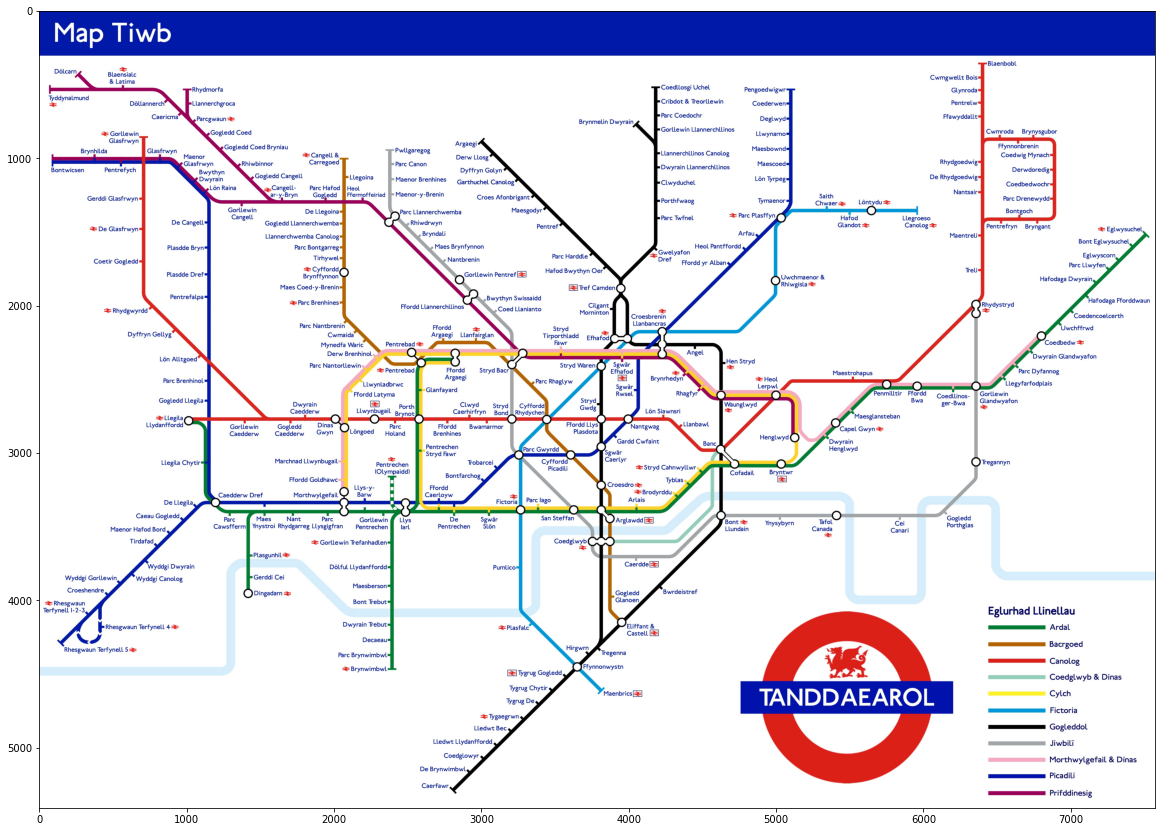

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
image = plt.imread('map_tiwb_hi-res.jpg')
plt.imshow(image)

In [ ]:
df = pd.read_csv('edges.csv')
df = nx.from_pandas_edgelist(df, source="# source", target=" target", edge_attr=True, create_using = nx.Graph())

In [ ]:
general_info =  print(nx.info(df))
directed = print("Is directed: ", nx.is_directed(df))
weighted = print("Is weighted: ", nx.is_weighted(df))
eupath = print("Has Eulerian path: ", nx.has_eulerian_path(df))
bipartite = print("Is bipartite: ", nx.is_bipartite(df))
dens = print("Density: ", nx.density(df))

Name: 
Type: Graph
Number of nodes: 369
Number of edges: 430
Average degree:   2.3306
Is directed:  False
Is weighted:  False
Has Eulerian path:  False
Is bipartite:  False
Density:  0.006333215506068104


## **VİSUALİZATİON**

# **Betweenness Centrality**

I visualized the network such that the node color varies with Degree and node size with

We can find the top centrality nodes for the promotion of our new product. Assuming that more people will pass through these points, I can consider these points as my central locations. 

(-0.8434048802433686,
 0.9305926992865978,
 -0.9892159845032877,
 1.0947245706906328)

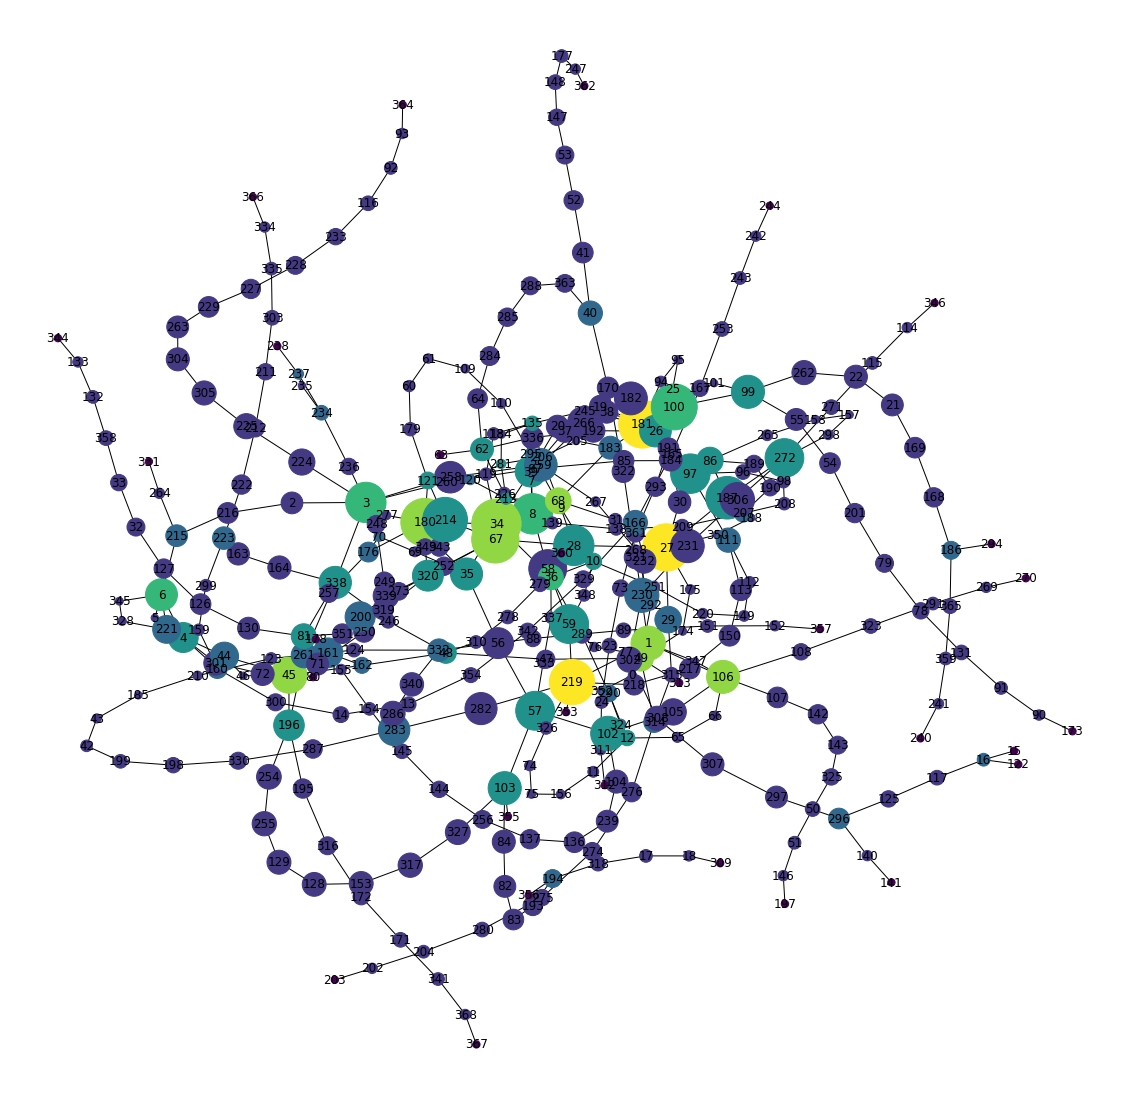

In [ ]:
pos = nx.spring_layout(df)
betCent = nx.betweenness_centrality(df, normalized=True, endpoints=True)
node_color = [20000.0 * df.degree(v) for v in df]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(df, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Yellow and green points can be determined as the target location in product promotion for us.

The labels of the nodes with the highest betweenness centrality are below

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[34, 180, 181, 67, 27]

In [ ]:
nx.density(df)

0.006333215506068104

In [ ]:
print("Nodes = 369")
print("Edges = 430")
print("Potential Connections =",369*(368/2),"Actual Connections = 430")
print("it seems that density of our graph is relatively low")

Nodes = 369
Edges = 430
Potential Connections = 67896.0 Actual Connections = 430
it seems that density of our graph is relatively low


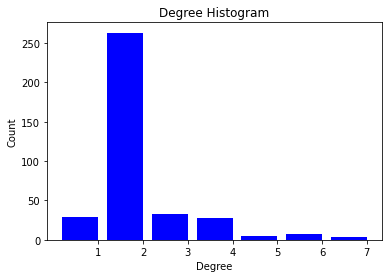

In [ ]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in df.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

# **Calculating Centrality Measures**

I want to check Closeness, Katz, Pagerank, Betweenness, Degree centralities to see central location in tube network.

With this mesurement , we can see the repeated location number and define them to central location to advertise our new product

In [ ]:
dgc = nx.degree_centrality(df)
eig = nx.eigenvector_centrality(df)
ktz = nx.katz_centrality(df)
pgr = nx.pagerank(df)
cls = nx.closeness_centrality(df)
btw = nx.betweenness_centrality(df)
cr = pd.DataFrame(index=df.nodes())
cr['dgc'] = cr.index.map(dgc)
cr['eig'] = cr.index.map(eig)
cr['ktz'] = cr.index.map(ktz)
cr['pgr'] = cr.index.map(pgr)
cr['cls'] = cr.index.map(cls)
cr['btw'] = cr.index.map(btw)
result = cr.sort_values(by='eig', ascending=False)
result

,dgc,eig,ktz,pgr,cls,btw
68,0.016304,3.968158e-01,0.078050,0.004689,0.109524,0.060848
67,0.016304,3.903624e-01,0.078231,0.004769,0.112953,0.219820
213,0.010870,3.097563e-01,0.066775,0.003154,0.104338,0.007477
28,0.010870,2.835514e-01,0.067609,0.003361,0.109949,0.158123
214,0.010870,2.231449e-01,0.066013,0.003320,0.110048,0.195798
...,...,...,...,...,...,...
92,0.005435,1.338169e-09,0.048698,0.002947,0.046512,0.010840
362,0.002717,1.329813e-09,0.043824,0.001738,0.044348,0.000000
238,0.002717,1.201250e-09,0.044384,0.001458,0.043401,0.000000
93,0.005435,3.801392e-10,0.048251,0.003140,0.044461,0.005435


In [ ]:
cr.sort_values(by='dgc', ascending=False).head(5).index

Int64Index([27, 219, 181, 1, 45], dtype='int64')

In [ ]:
cr.sort_values(by='ktz', ascending=False).head(5).index


Int64Index([27, 181, 67, 219, 34], dtype='int64')

In [ ]:
cr.sort_values(by='cls', ascending=False).head(5).index

Int64Index([67, 214, 28, 181, 68], dtype='int64')

In [ ]:
cr.sort_values(by='btw', ascending=False).head(5).index


Int64Index([34, 180, 181, 67, 27], dtype='int64')

Supporting what we said above, our central points **27,181,67** are seen as the most recurring values.

In our graph we saw these locations as central point.Lets check them which number is which the location
[34, 180, 181, 67, 27]


**34=Bank
180=Waterloo
181=Kingscrossstpancras
67=Greenpark
27=Bakerstreet** are the central tube stations for London. 